# Journey Data Attrition Analysis
### Ting Sun -- Nov, 2019

In [1]:
import pandas as pd
import os
import numpy as np
import seaborn as sns

In [2]:
import gc
gc.collect()

7

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
from sklearn.utils import resample
from sklearn.metrics import confusion_matrix, precision_recall_curve
from sklearn.metrics import recall_score, classification_report, auc, roc_curve,roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier


In [5]:
import pandas_profiling as pandprof

In [6]:
import matplotlib.pyplot as plt
#import scikitplot as skplt
from sklearn import metrics

In [7]:
from imblearn.over_sampling import SMOTE

C:\Users\tsun04\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [8]:
import csv
import itertools

In [9]:
from tensorflow.python.keras.layers import Input, Dense, Dropout,LSTM
from tensorflow.python.keras.models import Model, load_model


In [10]:

from tensorflow.python.keras.callbacks import ModelCheckpoint, TensorBoard
from tensorflow.python.keras import regularizers, Sequential

In [11]:
from tensorflow.python.keras.preprocessing.text import one_hot
from tensorflow.python.keras.preprocessing.sequence import pad_sequences
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import Flatten
from tensorflow.python.keras.layers.embeddings import Embedding

In [12]:
from tensorflow.python.keras.preprocessing.text import Tokenizer

In [13]:
import os
import pandas as pd

In [14]:
univ=pd.read_csv('C:\\Users\\tsun04\\event_sequence_embedding\\JRN_UNIVERSE_201909WK1_FLATTEN2.csv', encoding='utf-8',sep=",") #Read excel file

C:\Users\tsun04\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [15]:
univ.head()

,trim_eventseq,OCIF_id,attrited
0,opt257,001069464216288,0
1,opt465,001069464307179,0
2,opt302,001069464309050,0
3,opt082 opt137,001069466113872,0
4,opt460 opt421,001069467716456,0


In [16]:
univ.dtypes

trim_eventseq    object
OCIF_id          object
attrited          int64
dtype: object

In [17]:
#remove 'trn031' for modeling

univ['trim_eventseq'].str.contains('trn031').values.sum()

0

In [18]:
docseq=np.array(univ['trim_eventseq'])

In [19]:
labels=np.array(univ['attrited'])

In [20]:
docseq[200:300]

array(['opt302', 'opt302', 'opt182', 'opt302', 'opt256', 'opt302',
       'opt257 opt465', 'opt256', 'opt256', 'opt252', 'opt084', 'opt302',
       'opt294', 'opt527', 'opt460', 'opt456', 'opt253', 'opt342 opt412',
       'opt482 opt465 opt228', 'opt565 opt412', 'opt290', 'opt429',
       'opt256', 'opt527', 'opt302', 'opt283', 'opt137', 'opt465',
       'opt302', 'opt253', 'opt234 opt257', 'opt256', 'opt317', 'opt302',
       'opt137 opt302 opt137', 'opt456', 'opt252', 'opt284', 'opt454',
       'opt256', 'opt249', 'opt257', 'opt226', 'opt257', 'opt302',
       'opt256', 'opt089', 'opt253', 'opt283', 'opt302', 'opt302',
       'opt257', 'opt319', 'opt294', 'opt465 opt527', 'opt565 opt410',
       'opt252 opt082', 'opt454', 'opt527', 'opt527', 'opt137', 'opt290',
       'opt283', 'opt252', 'opt302', 'opt302', 'opt253', 'opt179',
       'opt082', 'opt292', 'opt257', 'opt137', 'opt454', 'opt290',
       'opt137', 'opt417', 'opt465', 'opt296', 'opt527', 'opt509',
       'opt226', 'opt087'

In [21]:
#samp_doc=docseq[:100000]

In [22]:
#samp_label=labels[:100000]

In [23]:
all_words = []
for sent in docseq:
    for word in sent.split(' '):        
        all_words.append(word.strip())

In [24]:
unique_words = set(all_words)
print(len(unique_words))

1474


In [25]:
embedded_sentences = [one_hot(sent, len(unique_words)) for sent in docseq]

In [26]:
embedded_sentences[:10]

[[47],
 [244],
 [951],
 [1149, 680],
 [1424, 623],
 [923, 498],
 [680],
 [1075],
 [315],
 [47]]

In [27]:
def find_max_list(list):
    list_len = [len(i) for i in list]
    return(max(list_len))

In [28]:
max_len=find_max_list(embedded_sentences)

In [29]:
max_len

499

In [30]:
padded_sentences = pad_sequences(embedded_sentences, max_len, padding='post')
print(padded_sentences[:10])


[[  47    0    0 ...    0    0    0]
 [ 244    0    0 ...    0    0    0]
 [ 951    0    0 ...    0    0    0]
 ...
 [1075    0    0 ...    0    0    0]
 [ 315    0    0 ...    0    0    0]
 [  47    0    0 ...    0    0    0]]


In [31]:
vocab_length=len(unique_words)

In [32]:
max_len

499

In [33]:
type(padded_sentences)

numpy.ndarray

In [34]:
univ.head()

,trim_eventseq,OCIF_id,attrited
0,opt257,001069464216288,0
1,opt465,001069464307179,0
2,opt302,001069464309050,0
3,opt082 opt137,001069466113872,0
4,opt460 opt421,001069467716456,0


In [35]:
padded_sentences.shape

(1006927, 499)

In [36]:
univ.shape

(1006927, 3)

In [37]:
dftry=pd.DataFrame(padded_sentences)

In [38]:
dftry.columns

RangeIndex(start=0, stop=499, step=1)

In [39]:
univ1=pd.concat([univ,dftry],axis=1)

In [40]:
univ1.shape

(1006927, 502)

## smote oversampling 

In [41]:
os = SMOTE(random_state=9)

In [42]:
smoteY=univ1['attrited']

In [45]:
smoteX=univ1.loc[:, (univ1.columns != 'attrited') & (univ1.columns != 'OCIF_id') & (univ1.columns != 'trim_eventseq')]

In [46]:
smoteX.head()

,0,1,2,3,4,5,6,7,8,9,...,489,490,491,492,493,494,495,496,497,498
0,47,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,244,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,951,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1149,680,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1424,623,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
sX_train, sX_test, sy_train, sy_test = train_test_split(smoteX, smoteY, test_size=0.3, random_state=8)

In [48]:
os_data_X,os_data_y=os.fit_sample(sX_train, sy_train)


In [49]:
sX_test.shape

(302079, 499)

In [50]:
sX_train.shape

(704848, 499)

In [51]:
columns = sX_train.columns

In [52]:
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])

In [53]:
os_data_y.head()

,y
0,0
1,0
2,0
3,0
4,0


In [54]:
os_data_y['y'].value_counts()

1    700004
0    700004
Name: y, dtype: int64

## training MLP with embedding layers

In [55]:
model = Sequential()
model.add(Embedding(vocab_length, 20, input_length=max_len))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# summarize the model
print(model.summary())

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 499, 20)           29480     
_________________________________________________________________
flatten (Flatten)            (None, 9980)              0         
_________________________________________________________________
dense (Dense)                (None, 1)                 9981      
Total params: 39,461
Trainable params: 39,461
Non-trainable params: 0
_________________________________________________________________
None


In [56]:
os_data_X.shape

(1400008, 499)

In [57]:
smot_seq=np.array(os_data_X)

In [58]:
labels=np.array(os_data_y)

In [59]:
sy_test.shape

(302079,)

In [60]:
smot_testX=np.array(sX_test)

In [61]:
smot_testy=np.array(sy_test)

In [78]:
mcp_save = ModelCheckpoint('mdl_wts.hdf5', save_best_only=True, monitor='val_acc', mode='max')

In [79]:

# fit the model
train_hist=model.fit(smot_seq, labels, epochs=40, verbose=1
                    ,validation_data =(smot_testX,smot_testy),callbacks=[ mcp_save]).history



Train on 1400008 samples, validate on 302079 samples
Epoch 1/40
1400008/1400008 [==============================] - 316s 226us/sample - loss: 0.1444 - acc: 0.9426 - val_loss: 0.1685 - val_acc: 0.9514
Epoch 2/40
1400008/1400008 [==============================] - 340s 243us/sample - loss: 0.1438 - acc: 0.9428 - val_loss: 0.1606 - val_acc: 0.9482
Epoch 3/40
1400008/1400008 [==============================] - 353s 252us/sample - loss: 0.1436 - acc: 0.9428 - val_loss: 0.1656 - val_acc: 0.9473
Epoch 4/40
1400008/1400008 [==============================] - 275s 197us/sample - loss: 0.1434 - acc: 0.9430 - val_loss: 0.1603 - val_acc: 0.9474
Epoch 5/40
1400008/1400008 [==============================] - 265s 189us/sample - loss: 0.1432 - acc: 0.9429 - val_loss: 0.1676 - val_acc: 0.9556
Epoch 6/40
1400008/1400008 [==============================] - 276s 197us/sample - loss: 0.1431 - acc: 0.9430 - val_loss: 0.1512 - val_acc: 0.9569
Epoch 7/40
1400008/1400008 [==============================] - 361s 258u

In [80]:
train_hist['val_acc']

[0.95138025,
 0.9481824,
 0.9472754,
 0.94744754,
 0.9555911,
 0.9568954,
 0.9574019,
 0.9579845,
 0.95561093,
 0.9564783,
 0.95328707,
 0.95433974,
 0.9562002,
 0.9565544,
 0.9550283,
 0.9458751,
 0.9569517,
 0.9568292,
 0.9572926,
 0.9554918,
 0.9552236,
 0.9563558,
 0.95417094,
 0.95545536,
 0.95576984,
 0.9549555,
 0.9452527,
 0.94530237,
 0.95603466,
 0.95575994,
 0.9563194,
 0.9560744,
 0.95603466,
 0.9561307,
 0.9549224,
 0.9565312,
 0.95618695,
 0.95507467,
 0.9608447,
 0.9561141]

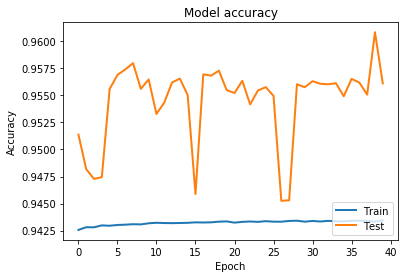

In [81]:
plt.plot(train_hist['acc'], linewidth=2, label='Train')
plt.plot(train_hist['val_acc'], linewidth=2, label='Test')
plt.legend(loc='lower right')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

In [82]:
model=load_model('mdl_wts.hdf5')

In [83]:
y_pred = model.predict_proba(smot_testX)

In [84]:
y_binpred=model.predict_classes(smot_testX)

In [85]:
y_binpred.shape

(302079, 1)

In [75]:
from sklearn.metrics import roc_auc_score,roc_curve,accuracy_score

In [86]:
accuracy_score(smot_testy,y_binpred)

0.9608446797029916

In [88]:
roc_auc_score(smot_testy,y_pred)

0.8163590216808747

In [90]:
log_fpr, log_tpr, log_thresold = roc_curve(smot_testy, y_pred)

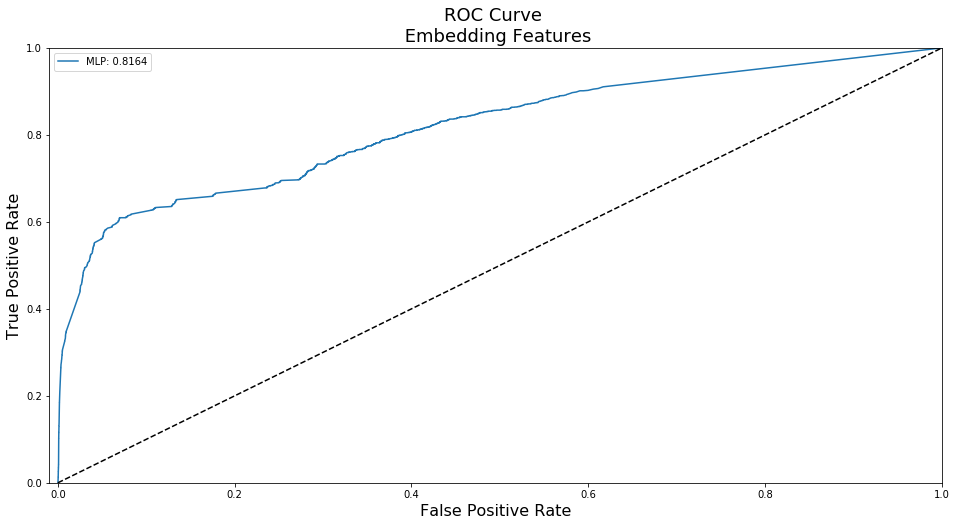

In [92]:
plt.figure(figsize=(16,8))
plt.title('ROC Curve \n Embedding Features', fontsize=18)
plt.plot(log_fpr, log_tpr, label='MLP: {:.4f}'.format(roc_auc_score(smot_testy, y_pred)))
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.01, 1, 0, 1])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.legend()
plt.show()

In [69]:
from sklearn.metrics import classification_report


In [93]:
print(classification_report(smot_testy, y_binpred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98    299989
           1       0.09      0.52      0.15      2090

    accuracy                           0.96    302079
   macro avg       0.54      0.74      0.57    302079
weighted avg       0.99      0.96      0.97    302079



In [95]:
confusion_matrix(smot_testy, y_binpred)

array([[289173,  10816],
       [  1012,   1078]], dtype=int64)

## check for overfitting

In [96]:
#logregpred.score( sX_train,sy_train)

In [97]:
#logregpred.score( sX_test,sy_test)

## create profile report


In [103]:
#pandasreport=pandprof.ProfileReport(univ)

In [104]:
#pandasreport.to_file("Sequence_Embedding_fn_EDA.html")